In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import Tracking_Py

In [3]:
with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/whole_image/avg_data/U_avg.h5", "r") as file:
    U = file["matrix"][:]
with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/whole_image/avg_data/V_avg.h5", "r") as file:
    V = file["matrix"][:]

with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/whole_image/avg_data/M_avg.h5", "r") as file:
    M = file["matrix"][:]
    
with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/whole_image/avg_data/xgrid_matrix", "r") as file:
    xgrid = file["matrix"][:]
    
with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/whole_image/avg_data/ygrid_matrix", "r") as file:
    ygrid = file["matrix"][:]

# Tracking with whole image (1) -- Cutting aggregates -- Running out of vector field region error. 
Cutting the aggregates out from the whole image and do pseudo tracking.

In [4]:
np.shape(U)

(185, 63, 63)

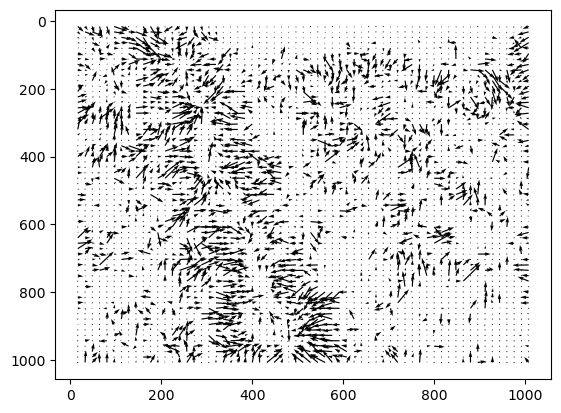

In [5]:
plt.quiver(xgrid[0], ygrid[0], V[0], -U[0])
plt.gca().invert_yaxis()

### Extract aggregates

In [6]:
# t = 100

# agg1_xgrid = xgrid[0][7:34, 12:39]
# agg1_ygrid = ygrid[0][7:34, 12:39]
# agg1_U = U[t][7:34, 12:39]
# agg1_V = V[t][7:34, 12:39]
# agg1_M = M[t][7:34, 12:39]

# plt.quiver(agg1_xgrid, agg1_ygrid, agg1_V, -agg1_U)

In [7]:
def aggegrate_over_time(U, V, M, agg_pos):
    # agg_pos: [x1, x2, y1, y2] indicating [x1:x2, y1:y2] 
    agg_U = []
    agg_V = []
    agg_M = []

    for t in range(np.shape(U)[0]): 
        agg_U.append(U[t][agg_pos[0]:agg_pos[1], agg_pos[2]:agg_pos[3]])
        agg_V.append(V[t][agg_pos[0]:agg_pos[1], agg_pos[2]:agg_pos[3]])
        agg_M.append(M[t][agg_pos[0]:agg_pos[1], agg_pos[2]:agg_pos[3]])

    return np.array(agg_U), np.array(agg_V), np.array(agg_M)

In [8]:
agg1_U, agg1_V, agg1_M = aggegrate_over_time(U, V, M, [7, 34, 12, 39])
agg1_xgrid = xgrid[0][7:34, 12:39]
agg1_ygrid = ygrid[0][7:34, 12:39]

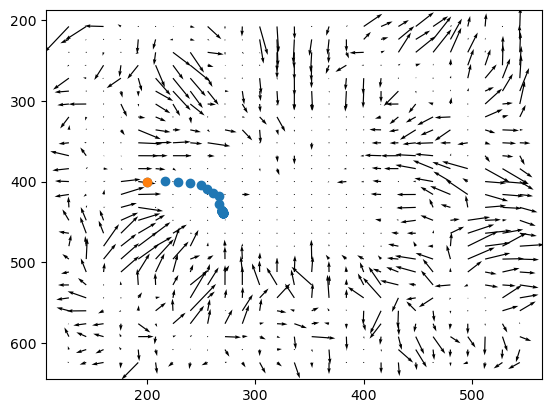

In [9]:
# Single pseudo track. 

agg1_pseudo_x, agg1_pseudo_y = Tracking_Py.pseudo_tracking_piv_grid_single_v2(agg1_U,
                                                                             agg1_V, 
                                                                             [0, 100],
                                                                             [200],
                                                                             [400])
plt.quiver(agg1_xgrid, agg1_ygrid, agg1_V[100], -agg1_U[100])
plt.scatter(agg1_pseudo_x, agg1_pseudo_y)
plt.scatter([200], [400])
# plt.xlim(100,600)
# plt.ylim(100,600)
plt.gca().invert_yaxis()

In [10]:
# Multiple pseudo tracks. 

# Giving start points, time intervals.
t_array = [[0, 100]]*6
start_x_array = [[200], [200], [300], [300], [400], [400]]
start_y_array = [[300], [400], [300], [400], [300], [400]]

multi_pseudo_x, multi_pseudo_y = Tracking_Py.pseudo_tracking_piv_grid_v2(agg1_U, agg1_V, 
                                                                        t_array, 
                                                                        start_x_array,
                                                                        start_y_array)
# TODO: why is with y = 500: Out of range error (30 out of 27)? since round(500/16 -1) = 30  

### The results below cannot be true...
Since the tacks are even run out of the region which is provide vector field --> It has values that are not based on the vector field ... :/

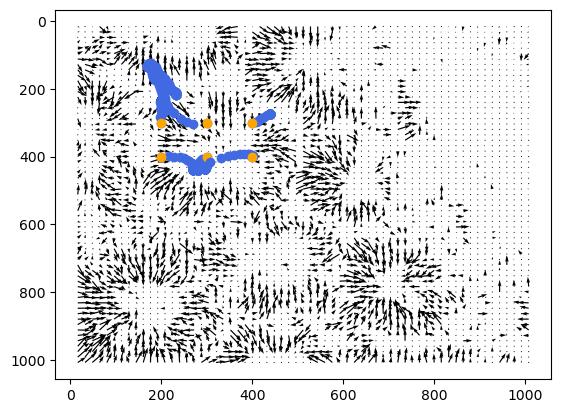

In [11]:
plt.quiver(xgrid[100], ygrid[100], V[100], -U[100])
for i in range(6): 
    plt.scatter(multi_pseudo_x[i], multi_pseudo_y[i], color = "royalblue")
    plt.scatter(start_x_array[i], start_y_array[i], color = "orange")
plt.gca().invert_yaxis()

# Tracking with the whole image (2) -- Directly with the whole image. 

Has the advantage that the tracks are not in one limited region of aggregates/vector fields. Allow more complete tracking and therefore less error with tracks (especially long tracks)

In [33]:
# Giving start points, time intervals.
start_x_array = [[200], [200], [300], [300], [400], [400], 
                 [100], [100], [200], [200], [300], [300],
                [400], [500], [400], [500], 
                [700], [700], [600], [800]]
start_y_array = [[300], [500], [300], [500], [300], [500], 
                 [800], [1000], [800], [1000], [800], [1000],
                [600], [850], [600], [850],
                [700], [900], [800], [800]]
t_array = [[0, 100]]*len(start_x_array)

whole_img_x, whole_img_y = Tracking_Py.pseudo_tracking_piv_grid_v2(U, V, t_array,
                                                                  start_x_array,
                                                                  start_y_array)

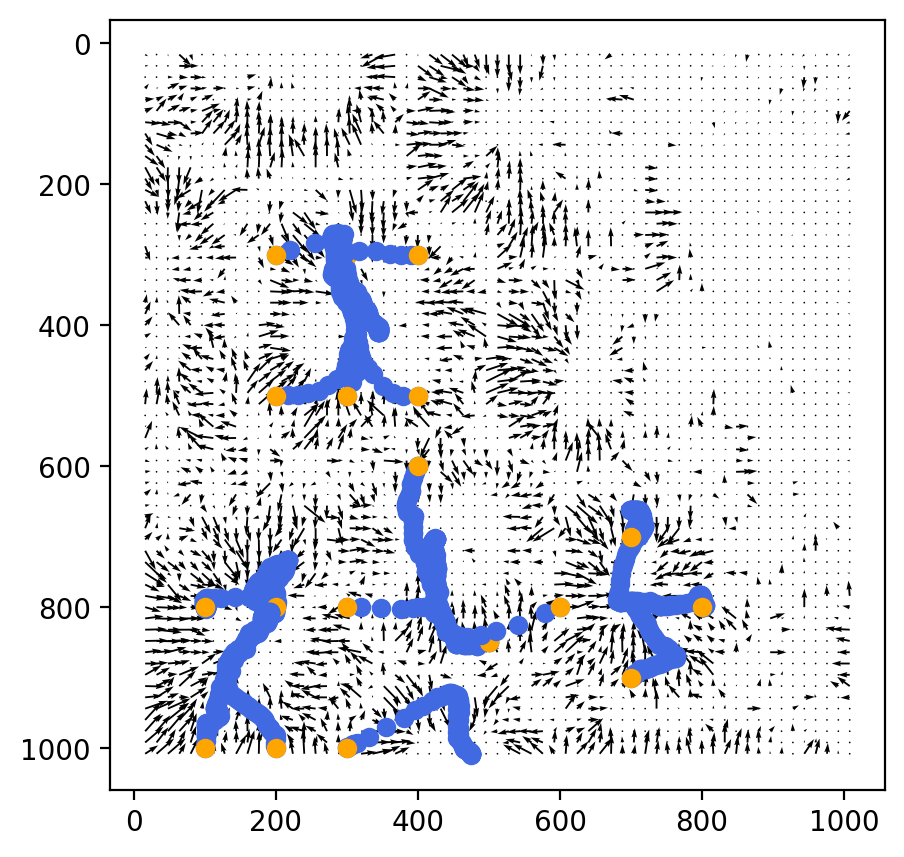

In [35]:
plt.figure(figsize=(5,5), dpi=200)
plt.quiver(xgrid[100], ygrid[100], V[100], -U[100])
#plt.quiver(agg1_xgrid, agg1_ygrid, agg1_V[100], -agg1_U[100])
for i in range(len(start_x_array)): 
    plt.scatter(whole_img_x[i], whole_img_y[i], color = "royalblue")
    plt.scatter(start_x_array[i], start_y_array[i], color = "orange")
plt.gca().invert_yaxis()
plt.show()

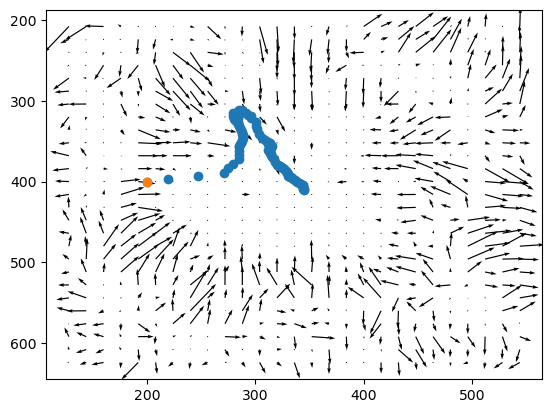

In [16]:
# Single pseudo track. 

agg1_pseudo_x, agg1_pseudo_y = Tracking_Py.pseudo_tracking_piv_grid_single_v2(U,
                                                                             V, 
                                                                             [0, 100],
                                                                             [200],
                                                                             [400])
plt.quiver(agg1_xgrid, agg1_ygrid, agg1_V[100], -agg1_U[100])
plt.scatter(agg1_pseudo_x, agg1_pseudo_y)
plt.scatter([200], [400])
# plt.xlim(100,600)
# plt.ylim(100,600)
plt.gca().invert_yaxis()